In [2]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
%matplotlib inline
from scipy.interpolate import interp1d

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!


In [18]:
figures_path = '/Users/erezcohen/Desktop/Projects/2NSRC/CLASppCMnote/Figures/'

In [19]:
nominal_results = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/final_results/nominal_results.csv')
nominal_results

,Unnamed: 0,target,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_x_final,sigma_x_final_up_err,sigma_x_final_dw_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_y_final,sigma_y_final_up_err,sigma_y_final_dw_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_t_final,sigma_t_final_err_sys,sigma_t_final_up_err_stat,sigma_t_final_dw_err_stat,sigma_t_final_up_err_tot,sigma_t_final_dw_err_tot
0,0,$^{12}$C,0.157110,0.006865,0.141195,0.006794,0.006743,0.160396,0.007007,0.145600,0.007023,0.007023,0.158720,0.004904,0.143316,0.003531,0.004197,0.004197,0.005485,0.005469
1,1,$^{27}$Al,0.180235,0.013666,0.161561,0.014590,0.014175,0.165708,0.012570,0.150011,0.013212,0.012853,0.172366,0.009252,0.155218,0.006977,0.008441,0.008441,0.010951,0.010709
2,2,$^{56}$Fe,0.177601,0.008388,0.155820,0.008737,0.008717,0.184577,0.008706,0.162605,0.009332,0.009176,0.180959,0.006040,0.159014,0.005330,0.005153,0.005153,0.007414,0.007359
3,3,$^{208}$Pb,0.195017,0.020634,0.173091,0.022853,0.021854,0.163082,0.017300,0.147490,0.017603,0.017252,0.176265,0.013257,0.157168,0.011068,0.011588,0.011588,0.016024,0.015681


In [20]:
modified_results = dict()
for extraname in ['MeanZLinearInPmiss','mean_rms','ConstBandAroundMeasuredValues']:
    modified_results[extraname] = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/final_results/'+extraname+'.csv')
    modified_results[extraname]['A'] = [12,27,56,208]
modified_results['ConstBandAroundMeasuredValues']    

,Unnamed: 0,target,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_xConstBandAroundMeasuredValues_final,sigma_xConstBandAroundMeasuredValues_final_up_err,sigma_xConstBandAroundMeasuredValues_final_dw_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_yConstBandAroundMeasuredValues_final,...,sigma_yConstBandAroundMeasuredValues_final_dw_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_tConstBandAroundMeasuredValues_final,sigma_tConstBandAroundMeasuredValues_final_err_sys,sigma_tConstBandAroundMeasuredValues_final_up_err_stat,sigma_tConstBandAroundMeasuredValues_final_dw_err_stat,sigma_tConstBandAroundMeasuredValues_final_up_err_tot,sigma_tConstBandAroundMeasuredValues_final_dw_err_tot,A
0,0,$^{12}$C,0.157110,0.006865,0.140983,0.008344,0.007930,0.160396,0.007007,0.146167,...,0.008345,0.158720,0.004904,0.143510,0.005596,0.004371,0.004175,0.007100,0.006981,12
1,1,$^{27}$Al,0.180235,0.013666,0.161266,0.014413,0.013877,0.165708,0.012570,0.150219,...,0.012450,0.172366,0.009252,0.155150,0.006837,0.008356,0.007931,0.010797,0.010472,27
2,2,$^{56}$Fe,0.177601,0.008388,0.157048,0.010732,0.010380,0.184577,0.008706,0.163696,...,0.011162,0.180959,0.006040,0.160120,0.007930,0.005557,0.005139,0.009683,0.009449,56
3,3,$^{208}$Pb,0.195017,0.020634,0.169815,0.021063,0.019828,0.163082,0.017300,0.144613,...,0.014676,0.176265,0.013257,0.153331,0.007254,0.011207,0.010708,0.013349,0.012934,208


In [21]:
NoPrecFiducials_results = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/final_results/NoPrecFiducials.csv')
NoPrecFiducials_results['A'] = [12,27,56,208]
NoPrecFiducials_results

,Unnamed: 0,target,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_xNoPrecFiducials_final,sigma_xNoPrecFiducials_final_up_err,sigma_xNoPrecFiducials_final_dw_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_yNoPrecFiducials_final,...,sigma_yNoPrecFiducials_final_dw_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_tNoPrecFiducials_final,sigma_tNoPrecFiducials_final_err_sys,sigma_tNoPrecFiducials_final_up_err_stat,sigma_tNoPrecFiducials_final_dw_err_stat,sigma_tNoPrecFiducials_final_up_err_tot,sigma_tNoPrecFiducials_final_dw_err_tot,A
0,0,$^{12}$C,0.153205,0.006371,0.138753,0.006337,0.006143,0.158348,0.006581,0.143918,...,0.006483,0.155693,0.004577,0.141237,0.003054,0.003983,0.003905,0.005019,0.004957,12
1,1,$^{27}$Al,0.182660,0.013470,0.165327,0.014079,0.014696,0.170539,0.012577,0.153943,...,0.012747,0.176184,0.009193,0.159009,0.006918,0.008224,0.008310,0.010747,0.010813,27
2,2,$^{56}$Fe,0.174405,0.007898,0.154357,0.008002,0.008244,0.184229,0.008333,0.161685,...,0.008582,0.179054,0.005732,0.157712,0.005074,0.004849,0.004730,0.007018,0.006936,56
3,3,$^{208}$Pb,0.189214,0.019198,0.168937,0.020919,0.020269,0.159613,0.016236,0.143996,...,0.016060,0.171957,0.012397,0.153268,0.010011,0.010495,0.010559,0.014504,0.014550,208


In [22]:
def plot_needed_for_A_depdendence_sigma_t(ax=None,figsize=(16,15),s=30,
                                          xlim=(2.5,250), ylim=(0,200), #79
                                          labels=dict({'$^4$He':(3.5,122),
                                                '$^{12}$C':(9,165),
                                                '$^{27}$Al':(21,182),
                                                '$^{56}$Fe':(45,185),
                                                '$^{208}$Pb':(140,184),                                               
                                                      }),
                                          fontsize=55,
                                          do_Ciofi=True):
    from scipy.interpolate import interp1d

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    # for all plots
    plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='black' ,label='Colle et al., All pairs')
    plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-',color='black', vary='nl00',label='Colle et al., $^1S_0$ pairs')
    if do_Ciofi: ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,markeredgecolor='black',marker='*',ms=30,mfc='none',linewidth=0, markeredgewidth=2,label='Ciofi and Simula')
    plot_data( data=BNL_Data, ax=ax, Ashift=1 , color='blue', marker='s', label=None )
    plot_data( data=HallA_Data, ax=ax, Ashift=-1 , color='blue' , marker='s' , label='Hall-A/BNL' )
    plot_data( data=Korover_Data , ax=ax, marker='s' , color='blue', label=None )
    
    ax.set_xscale('log')
    set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=fontsize 
             ,xticks=[4,12,27,56,208]
             ,yticks=[100,125,150,175,200])
    ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)    
    if xlim is not None:    ax.set_xlim(xlim);
    if ylim is not None:    ax.set_ylim(ylim);
    # target name labels
    for label in list(labels.keys()):
        ax.text(labels[label][0],labels[label][1],label,fontsize=35)
    return ax

def plot_A_depdendence_sigma_t(data=None,
                               figsize=(16,15),s=30,fontsize=55,
                               xlim=(2.5,250), ylim=(79,200),  #79
                               do_save_fig=True, filename='corrected_sigma_t_with_calculations',
                               labels=dict({'$^4$He':(3.5,122), '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,185), '$^{208}$Pb':(140,184), }),
                               do_Ciofi=True,do_measured=True,
                               do_stat_uncertainties=False,do_sys_uncertainties=False,do_tot_uncertainties=True):
    
    fig,ax = plt.subplots(figsize=figsize)
    ax=plot_needed_for_A_depdendence_sigma_t(ax=ax,figsize=figsize,fontsize=fontsize,s=s,xlim=xlim, ylim=ylim,labels=labels,do_Ciofi=do_Ciofi)
    # measured
    if do_measured: ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
    # corrected
    if do_tot_uncertainties:
        plot_data_assymetric( data=data, ax=ax, label='This work', markersize=20 ,color='red' , marker='o')
        
    # seperated statistical uncertainty
    if do_stat_uncertainties: 
        A,st,sterr = cm_pars['A'], 1000*data['sigma_t_final'], 1000*data['sigma_t_final_Err_stat']
        if do_tot_uncertainties:
            ax.errorbar(A,st,sterr ,ecolor='purple',elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')
        else: 
            ax.errorbar(A,st,sterr ,ecolor='red',color='red', marker='o', markersize=20 ,elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')

#     ax.legend(fontsize=25,loc='lower right')
    # add a band of systematical uncertaintes
    if do_sys_uncertainties:
        ax.fill_between(cm_pars['A']
                        , np.min(ax.get_ylim())
                        , np.min(ax.get_ylim()) + 1000*data['sigma_t_final_up_err_sys'] 
                        , color='purple' , alpha=0.5 ,  label='sys. uncertainties')
    ax.legend(fontsize=25,loc='upper left')

# generated vs. reconstructed in bins of generated

In [23]:
columns = ['Pmiss3Mag','pcmX','pcmY','pcmZ','rooWeight'] # ,'Mott','DipoleFF2'
data_allPmiss_PrecFid , data300Pmiss600_PrecFid = dict() , dict()
for target in ['C12','Al27','Fe56','Pb208']:
    data_allPmiss_PrecFid[target] = read_root( path+"/OrAnalysisTrees/AdjustedTrees/SRC_e2p_adjusted_300Pmiss600_%s_PrecFiducials.root"%target, columns=columns )
    data300Pmiss600_PrecFid[target] = data_allPmiss_PrecFid[target][data_allPmiss_PrecFid[target]['Pmiss3Mag']<0.6]

In [24]:
cm_parameters = dict()
cm_parameters_with_correction = dict()
for Fiducials in ["NoPrecFiducials","PrecFiducials"]:
    cm_pars = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/300Pmiss600/alltargets_'+Fiducials+'_dataCMparameters.csv')
    cm_pars['sigma_x_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_x_unweighted']) - np.square(0.02))
    cm_pars['sigma_x_before_acc_corr_err'] = cm_pars['sigma_xErr_unweighted']
    cm_pars['sigma_y_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_y_unweighted']) - np.square(0.02))
    cm_pars['sigma_y_before_acc_corr_err'] = cm_pars['sigma_yErr_unweighted']
    
    
    # weighted average
    sigma_x, Dsigma_x = cm_pars['sigma_x_before_acc_corr'], cm_pars['sigma_x_before_acc_corr_err']
    sigma_y, Dsigma_y = cm_pars['sigma_y_before_acc_corr'], cm_pars['sigma_y_before_acc_corr_err']
    sigma_t = (sigma_x/np.square(Dsigma_x)+sigma_y/np.square(Dsigma_y))/( 1./np.square(Dsigma_x) + 1./np.square(Dsigma_y))
    cm_pars['sigma_t_before_acc_corr'] = sigma_t    
    Dsigma_t = np.sqrt(1./( 1./np.square(Dsigma_x) + 1./np.square(Dsigma_y) ))
    cm_pars['sigma_t_before_acc_corr_err'] = Dsigma_t
    cm_parameters[Fiducials] = cm_pars
    cm_parameters_with_correction[Fiducials] = cm_pars
cm_parameters[Fiducials]

,Nevts,chi2red_x_unweighted,chi2red_y_unweighted,chi2red_z_unweighted,mean_xErr_unweighted,mean_x_unweighted,mean_yErr_unweighted,mean_y_unweighted,mean_zErr_unweighted,mean_z_unweighted,...,sigma_zErr_unweighted,sigma_z_unweighted,target,A,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err
0,266,0.602767,0.407306,2.139232,0.009711,-0.026697,0.009910,-0.005837,0.009028,0.106593,...,0.006384,0.147251,$^{12}$C,12,0.157110,0.006865,0.160396,0.007007,0.158720,0.004904
1,88,1.058674,0.542381,0.460758,0.019329,-0.035170,0.017791,0.017157,0.015036,0.118663,...,0.010629,0.141058,$^{27}$Al,27,0.180235,0.013666,0.165708,0.012570,0.172366,0.009252
2,227,0.471936,0.458693,1.598486,0.011862,-0.027254,0.012322,-0.009223,0.009999,0.149765,...,0.007069,0.150658,$^{56}$Fe,56,0.177601,0.008388,0.184577,0.008706,0.180959,0.006040
3,45,0.847317,0.596230,0.395723,0.029217,-0.024147,0.024489,0.016012,0.025269,0.177513,...,0.017832,0.169545,$^{208}$Pb,208,0.195017,0.020634,0.163082,0.017300,0.176265,0.013257


In [25]:
cm_parameters[Fiducials][['sigma_x_before_acc_corr','sigma_x_before_acc_corr_err','sigma_y_before_acc_corr','sigma_y_before_acc_corr_err','sigma_t_before_acc_corr','sigma_t_before_acc_corr_err']]

,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err
0,0.157110,0.006865,0.160396,0.007007,0.158720,0.004904
1,0.180235,0.013666,0.165708,0.012570,0.172366,0.009252
2,0.177601,0.008388,0.184577,0.008706,0.180959,0.006040
3,0.195017,0.020634,0.163082,0.017300,0.176265,0.013257


## cm_parameters['PrecFiducials']

In [26]:
targets = ['C','Al','Fe','Pb']
target_names = [r'$^{12}$C',r'$^{27}$Al',r'$^{56}$Fe',r'$^{208}$Pb']
colors = ['red','blue','forestgreen','purple']
As = [12,27,56,208]
Neep = [7598,2573,8558,2635]
Neepp = [266,88,227,45]

# the simulation assumes a Gaussian distribution around the meas. values with 5 standard deviations as width

saved /Users/erezcohen/Desktop/Projects/2NSRC/CLASppCMnote/Figures/mean_sigma_z_Adependence_band_5std_around_measured.pdf


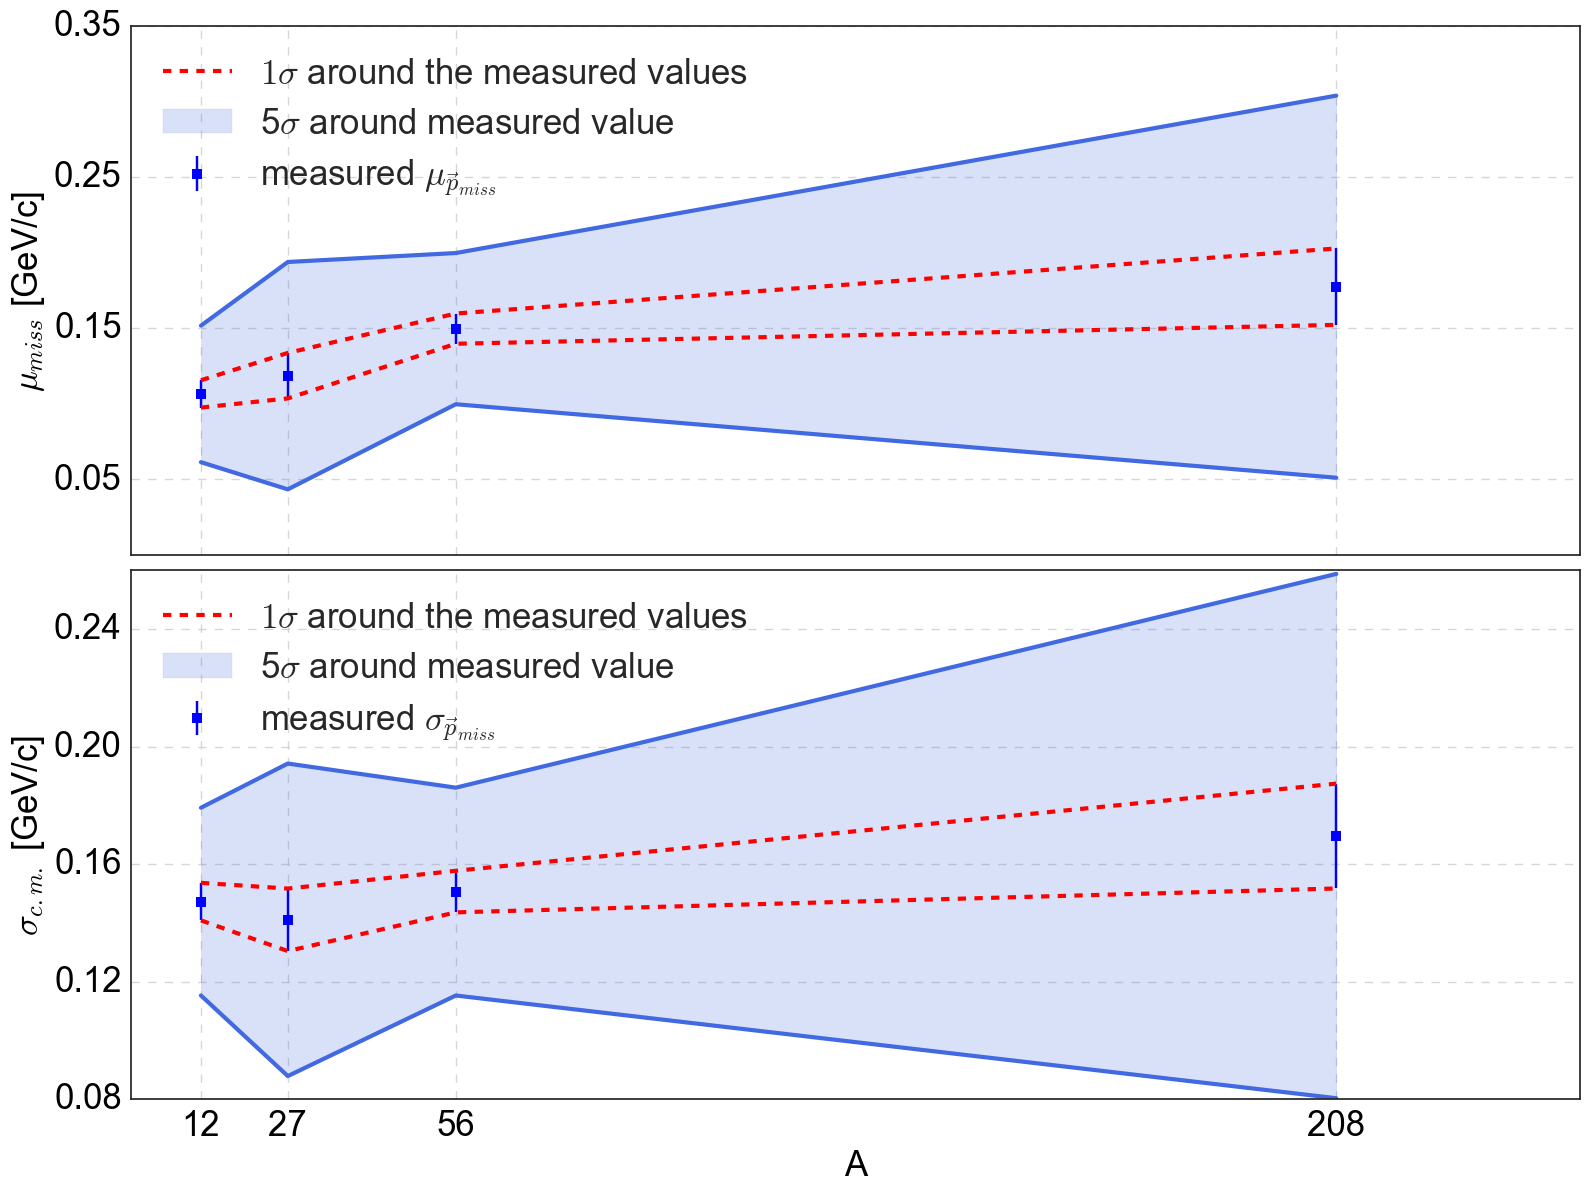

In [27]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,1,1)
ax.errorbar(x=cm_pars['A'],y=cm_pars['mean_z_unweighted'],yerr=cm_pars['mean_zErr_unweighted'],fmt='s'
            ,color='blue',label='measured $\\mu_{\\vec{p}_{miss}}$')
ax.fill_between(cm_pars['A']
                ,cm_pars['mean_z_unweighted']-5*cm_pars['mean_zErr_unweighted']
                ,cm_pars['mean_z_unweighted']+5*cm_pars['mean_zErr_unweighted']
                ,color='royalblue',alpha=0.2,label='5$\\sigma$ around measured value')
plt.plot(cm_pars['A'],cm_pars['mean_z_unweighted']-5*cm_pars['mean_zErr_unweighted'],'-',linewidth=3,color='royalblue')
plt.plot(cm_pars['A'],cm_pars['mean_z_unweighted']+5*cm_pars['mean_zErr_unweighted'],'-',linewidth=3,color='royalblue')

plt.plot(cm_pars['A'],cm_pars['mean_z_unweighted']-cm_pars['mean_zErr_unweighted'],'--',linewidth=3,color='red' 
         , label= r'$1\sigma$ around the measured values')
plt.plot(cm_pars['A'],cm_pars['mean_z_unweighted']+cm_pars['mean_zErr_unweighted'],'--',linewidth=3,color='red')


set_axes(ax,'','$\\mu_{miss}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.05,0.15,0.25,0.35]);
ax.grid(linestyle='--',alpha=0.8)
ax.legend(fontsize=25,loc='upper left')
ax.xaxis.set_major_formatter(NullFormatter())


ax = fig.add_subplot(2,1,2)
ax.errorbar(x=cm_pars['A'],y=cm_pars['sigma_z_unweighted'],yerr=cm_pars['sigma_zErr_unweighted'],fmt='s'
            ,color='blue',label='measured $\\sigma_{\\vec{p}_{miss}}$')
ax.fill_between(cm_pars['A']
                ,cm_pars['sigma_z_unweighted']-5*cm_pars['sigma_zErr_unweighted']
                ,cm_pars['sigma_z_unweighted']+5*cm_pars['sigma_zErr_unweighted']
                ,color='royalblue',alpha=0.2,label='5$\\sigma$ around measured value')
plt.plot(cm_pars['A'],cm_pars['sigma_z_unweighted']-5*cm_pars['sigma_zErr_unweighted'],'-',linewidth=3,color='royalblue')
plt.plot(cm_pars['A'],cm_pars['sigma_z_unweighted']+5*cm_pars['sigma_zErr_unweighted'],'-',linewidth=3,color='royalblue')

plt.plot(cm_pars['A'],cm_pars['sigma_z_unweighted']-cm_pars['sigma_zErr_unweighted'],'--',linewidth=3,color='red' 
         , label= r'$1\sigma$ around the measured values')
plt.plot(cm_pars['A'],cm_pars['sigma_z_unweighted']+cm_pars['sigma_zErr_unweighted'],'--',linewidth=3,color='red')


set_axes(ax,'A','$\\sigma_{c.m.}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.08,0.12,0.16,0.20,0.24]);
ax.grid(linestyle='--',alpha=0.8)
ax.legend(fontsize=25,loc='upper left')

plt.tight_layout()
outfilename = figures_path + 'mean_sigma_z_Adependence_band_5std_around_measured.pdf'
print 'saved',outfilename
plt.savefig(outfilename)

In [28]:
nominal_results['A']=[12,27,56,208]

In [29]:
nominal_results[['sigma_t_before_acc_corr','sigma_t_before_acc_corr_err'
                                                ,'sigma_t_final'
                                                ,'sigma_t_final_up_err_tot','sigma_t_final_dw_err_tot']].astype(float)

,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_t_final,sigma_t_final_up_err_tot,sigma_t_final_dw_err_tot
0,0.158720,0.004904,0.143316,0.005485,0.005469
1,0.172366,0.009252,0.155218,0.010951,0.010709
2,0.180959,0.006040,0.159014,0.007414,0.007359
3,0.176265,0.013257,0.157168,0.016024,0.015681


# $x$ and $y$ directions seperately

In [30]:
nominal_results['sigma_x_final_up_err_tot'] = nominal_results['sigma_x_final_up_err']
nominal_results['sigma_y_final_up_err_tot'] = nominal_results['sigma_y_final_up_err']
nominal_results['sigma_x_final_dw_err_tot'] = nominal_results['sigma_x_final_dw_err']
nominal_results['sigma_y_final_dw_err_tot'] = nominal_results['sigma_y_final_dw_err']

/Users/erezcohen/Library/Python/2.7/lib/python/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/usr/local/lib/python2.7/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


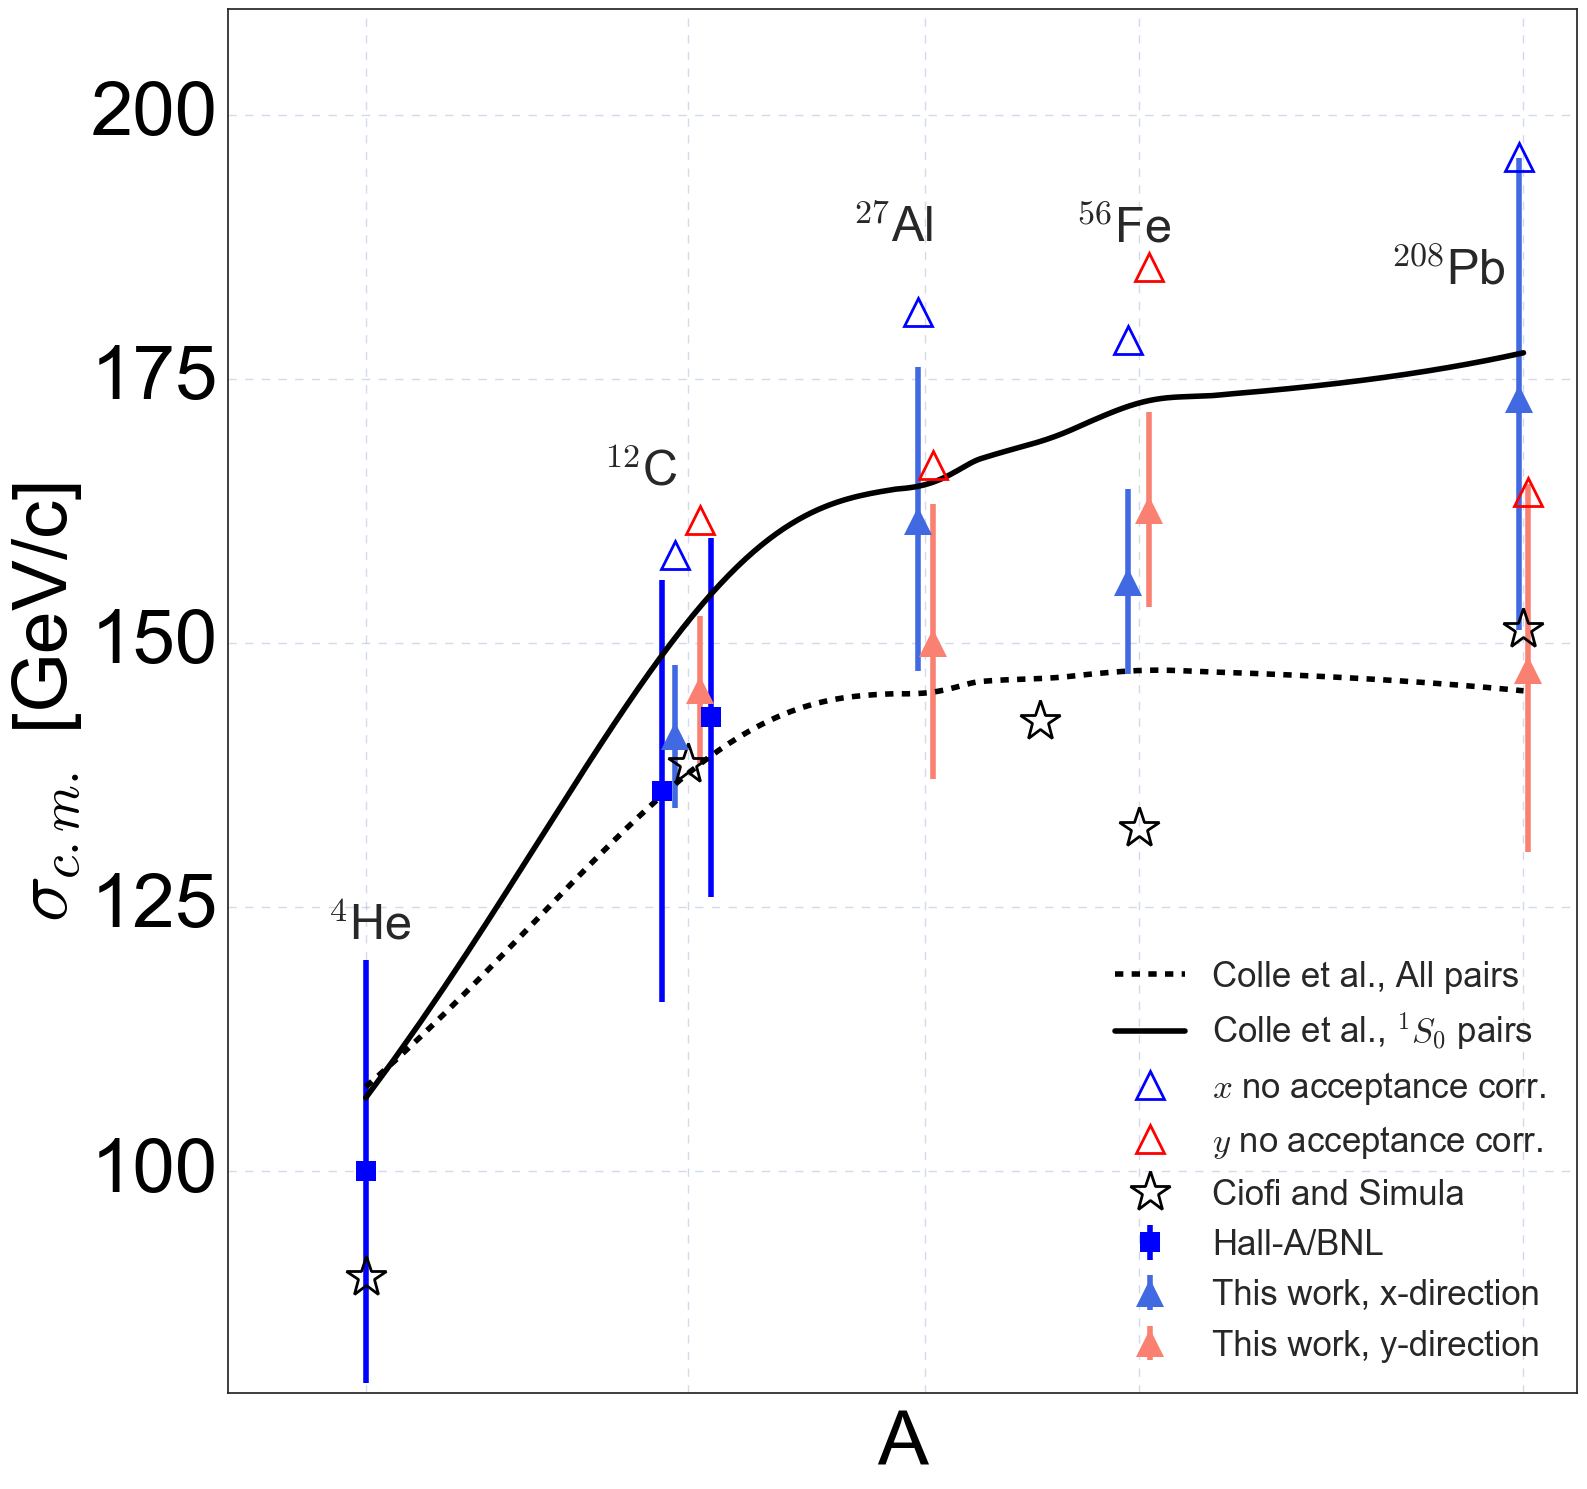

In [31]:
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,210),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165),
                                            '$^{27}$Al':(21,188),
                                            '$^{56}$Fe':(45,188),
                                            '$^{208}$Pb':(132,184),
                                           }))
ax.plot(cm_pars['A']+[-0.5,-0.7,-2,-3], 1000*cm_pars['sigma_x_unweighted'] ,mec='blue' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='$x$ no acceptance corr.')
plot_data_assymetric( data=nominal_results, ax=ax, Ashift=[-0.5,-0.7,-2,-3] , direction='x', label='This work, x-direction', color='royalblue',markersize=20 )
ax.plot(cm_pars['A']+[0.5,0.7,2,3], 1000*cm_pars['sigma_y_unweighted'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='$y$ no acceptance corr.')
plot_data_assymetric( data=nominal_results, ax=ax, Ashift=[0.5,0.7,2,3] ,direction='y', label='This work, y-direction', color='salmon', markersize=20 )
ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()
plt.savefig( figures_path + 'corrected_sigma_xy_with_calculations.pdf')

## final plot

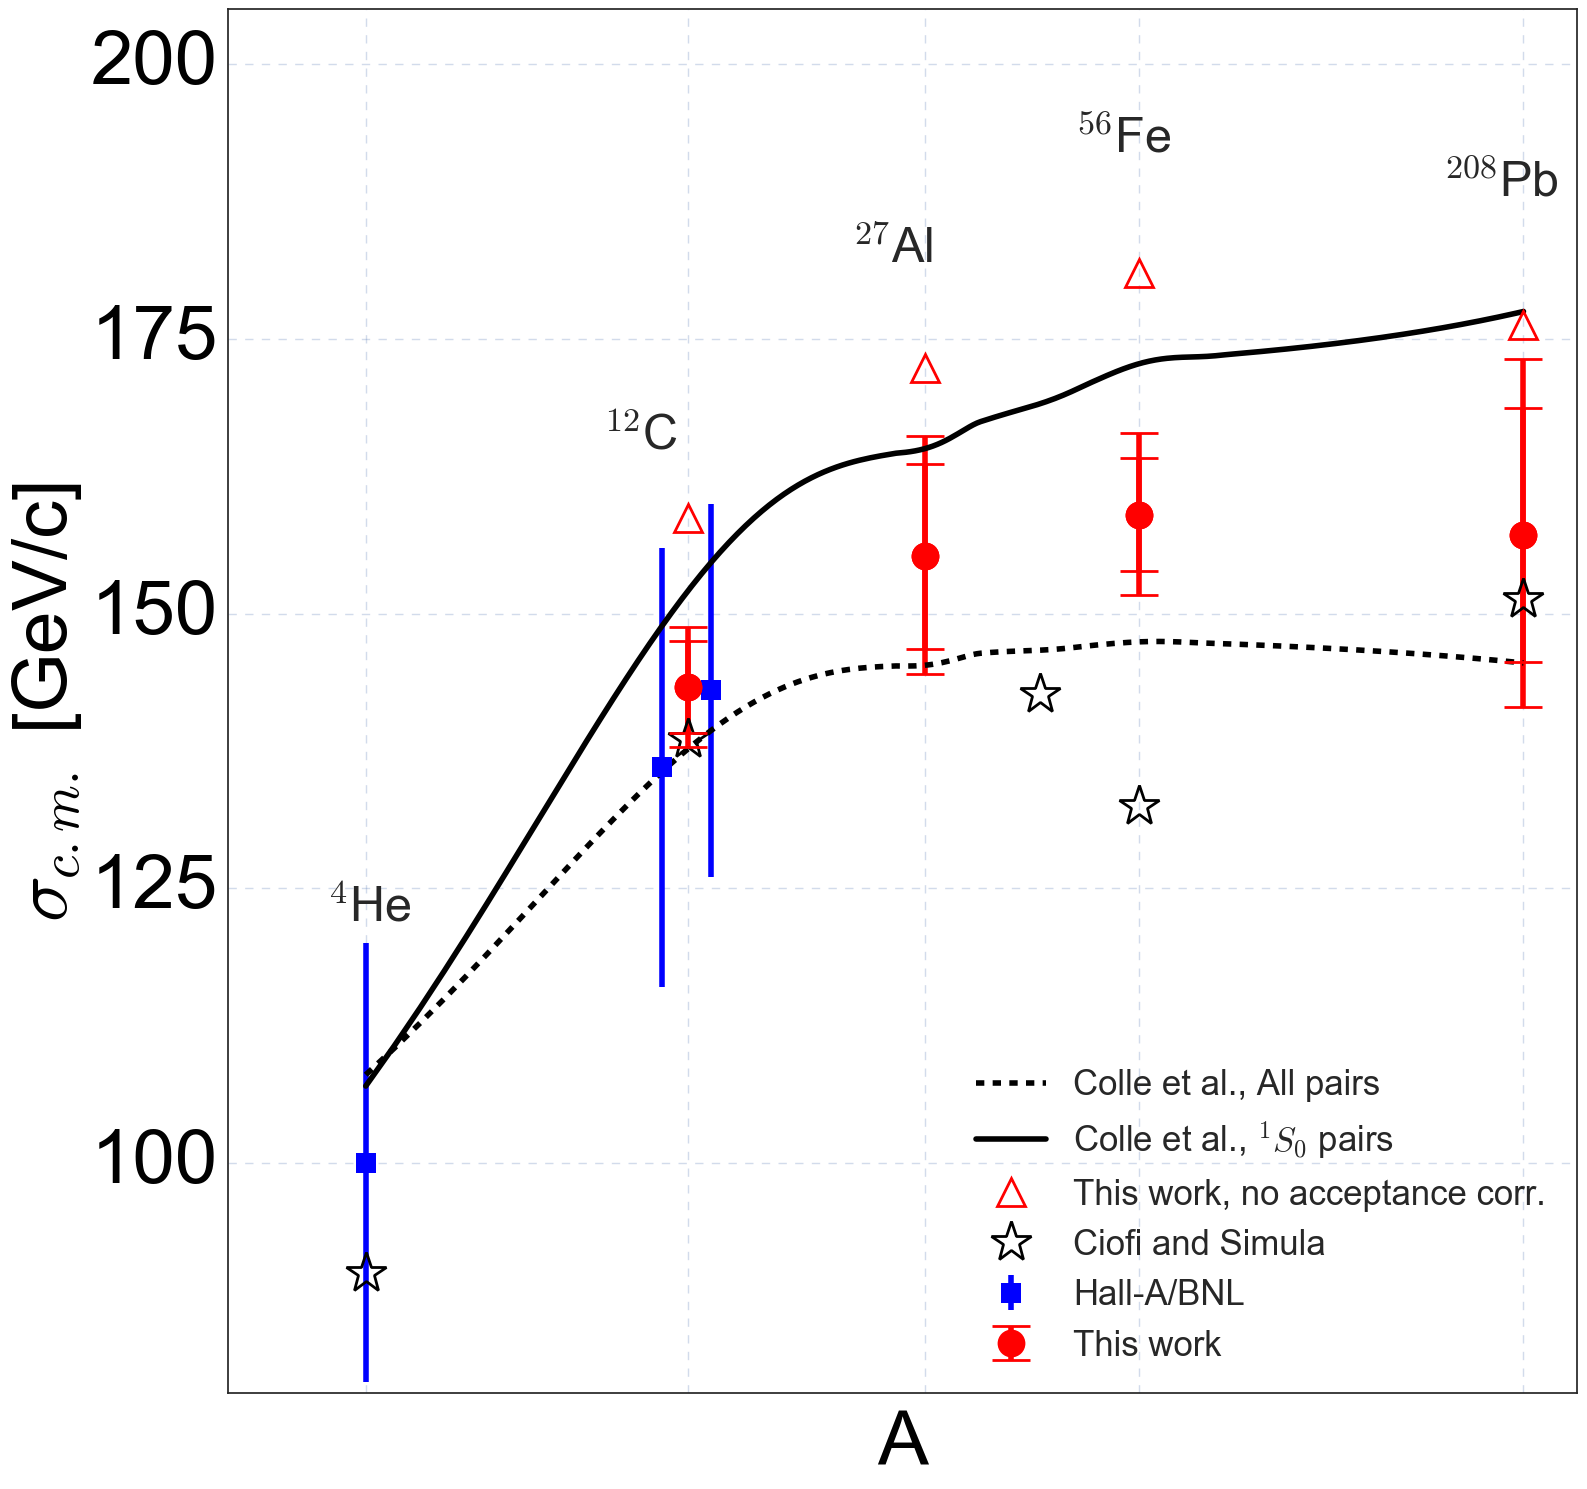

In [42]:
extraname=''
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(158,188), }),do_Ciofi=True)

plot_data_assymetric( data=nominal_results,direction='t',ax=ax, label="This work" , marker='o', markersize=20 , capthick=2, capsize=14 )
plt.legend(fontsize=20,loc='upper left')
# measured
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
plot_data_assymetric( data=nominal_results ,direction='t', unc_name='stat' , ax=ax , marker='o', markersize=20 , capthick=2 , capsize=14)

ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()
plt.savefig(figures_path +'results.pdf')    

# compare with previous results presented in WI

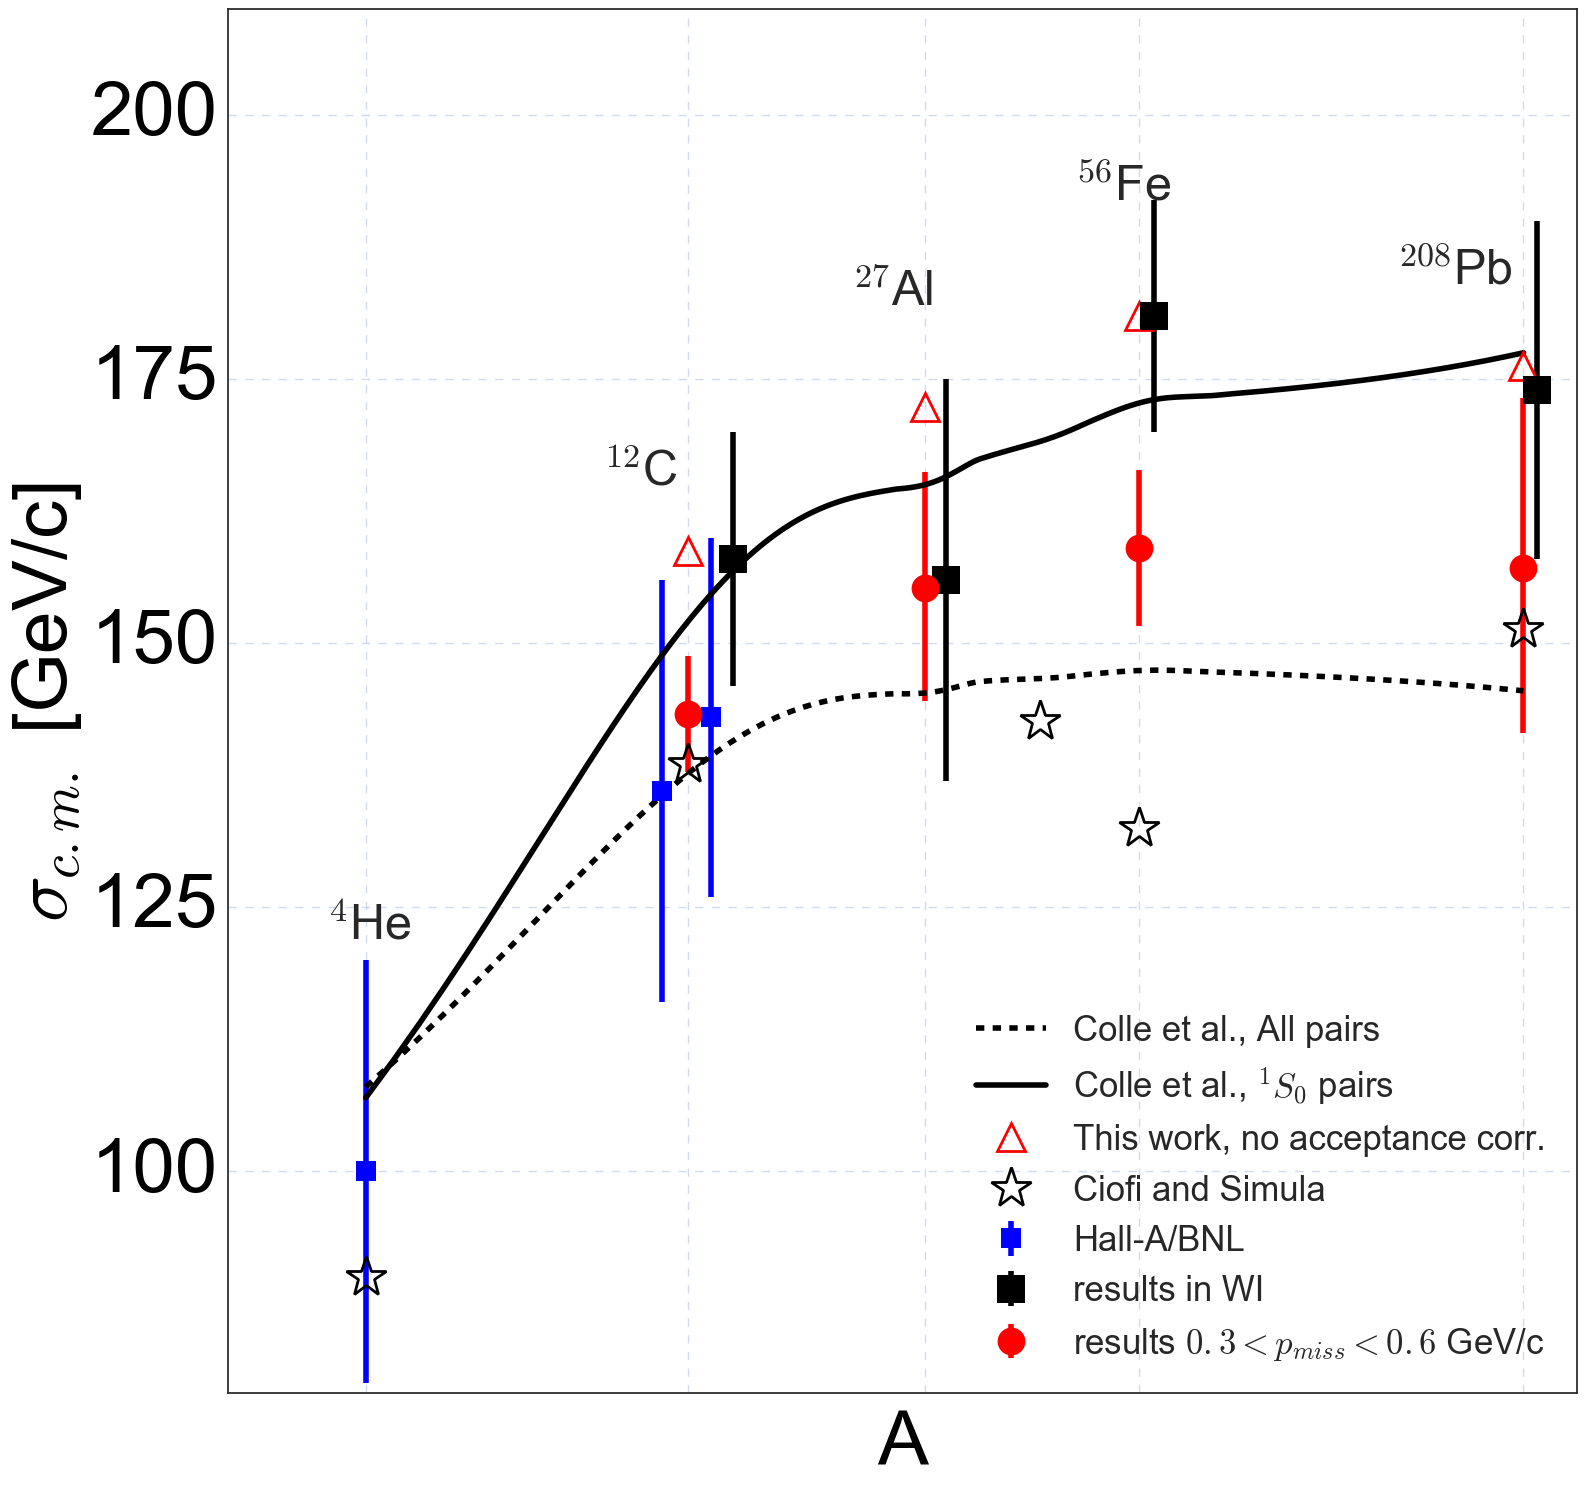

In [33]:
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,210),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(135,184), }))
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
plot_data( data=WI_Data, ax=ax,label='results in WI',Ashift=[2,2,3,10],  markersize=20 , marker='s', color='black')
plot_data_assymetric( data=nominal_results,ax=ax, label='results $0.3<p_{miss}<0.6$ GeV/c', marker='o', markersize=20 )
ax.legend(fontsize=25, loc='lower right')
plt.tight_layout()
plt.savefig( figures_path + 'corrected_sigma_t_vs_WI_results.pdf')

# Fiducial cuts vs. no Fiducial cuts

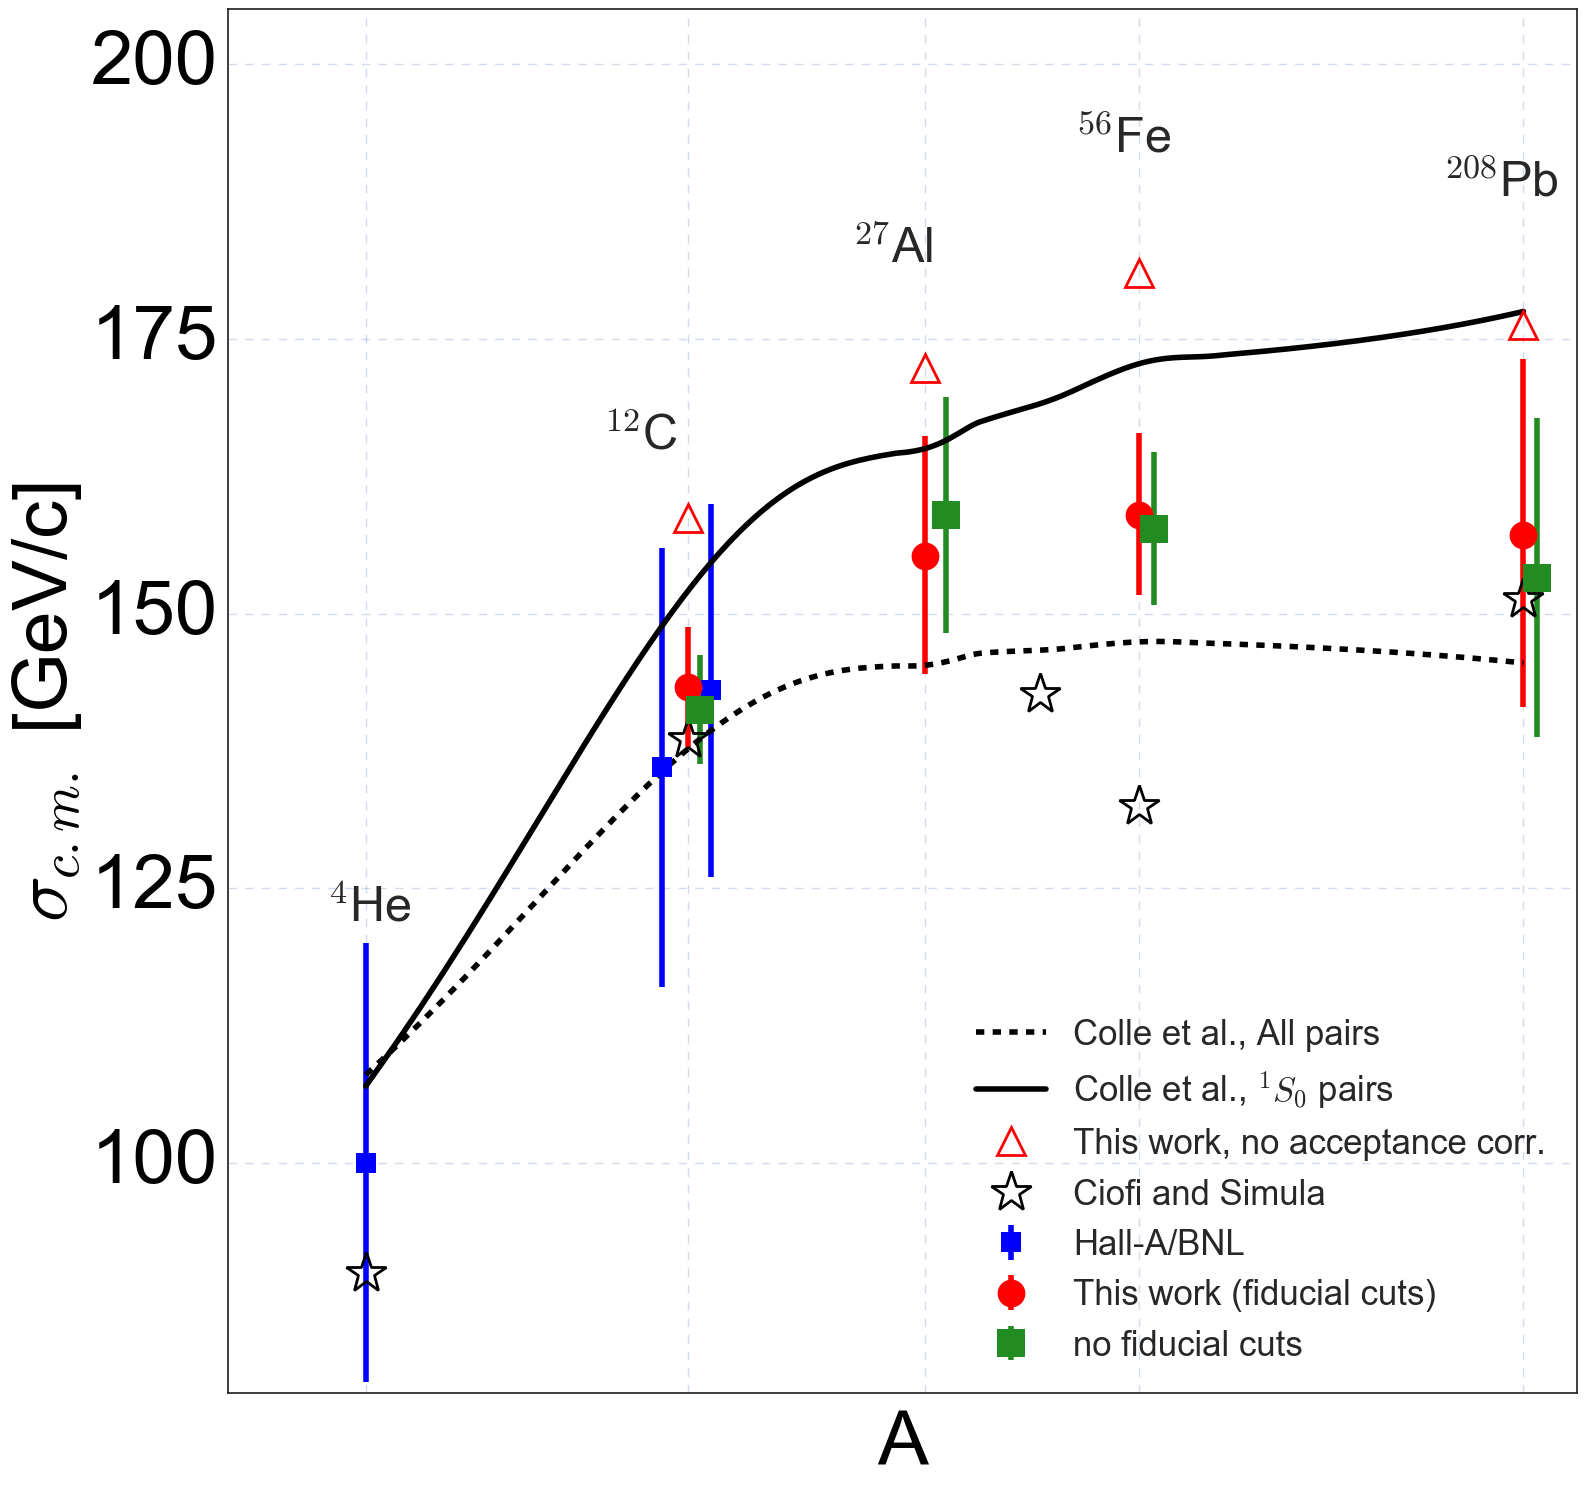

In [34]:
extraname='NoPrecFiducials'
label="no fiducial cuts"
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(158,188), }),do_Ciofi=True)
plot_data_assymetric( data=nominal_results,direction='t',ax=ax, label=r"This work (fiducial cuts)" , marker='o', markersize=20 )
plot_data_assymetric( data=NoPrecFiducials_results,Ashift=[0.5,2,3,10], direction='t'+extraname,ax=ax, label=label , marker='s', markersize=20 , color='forestgreen')
plt.legend(fontsize=20,loc='upper left')
# measured
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()
plt.savefig(figures_path +'results_compare_'+extraname+'.pdf')

# compare constant band around mean(z) & \sigma(z) with 5  ×Δmeasured 

saved /Users/erezcohen/Desktop/Projects/2NSRC/CLASppCMnote/Figures/mean_sigma_z_Adependence_constant_band_around_measured.pdf


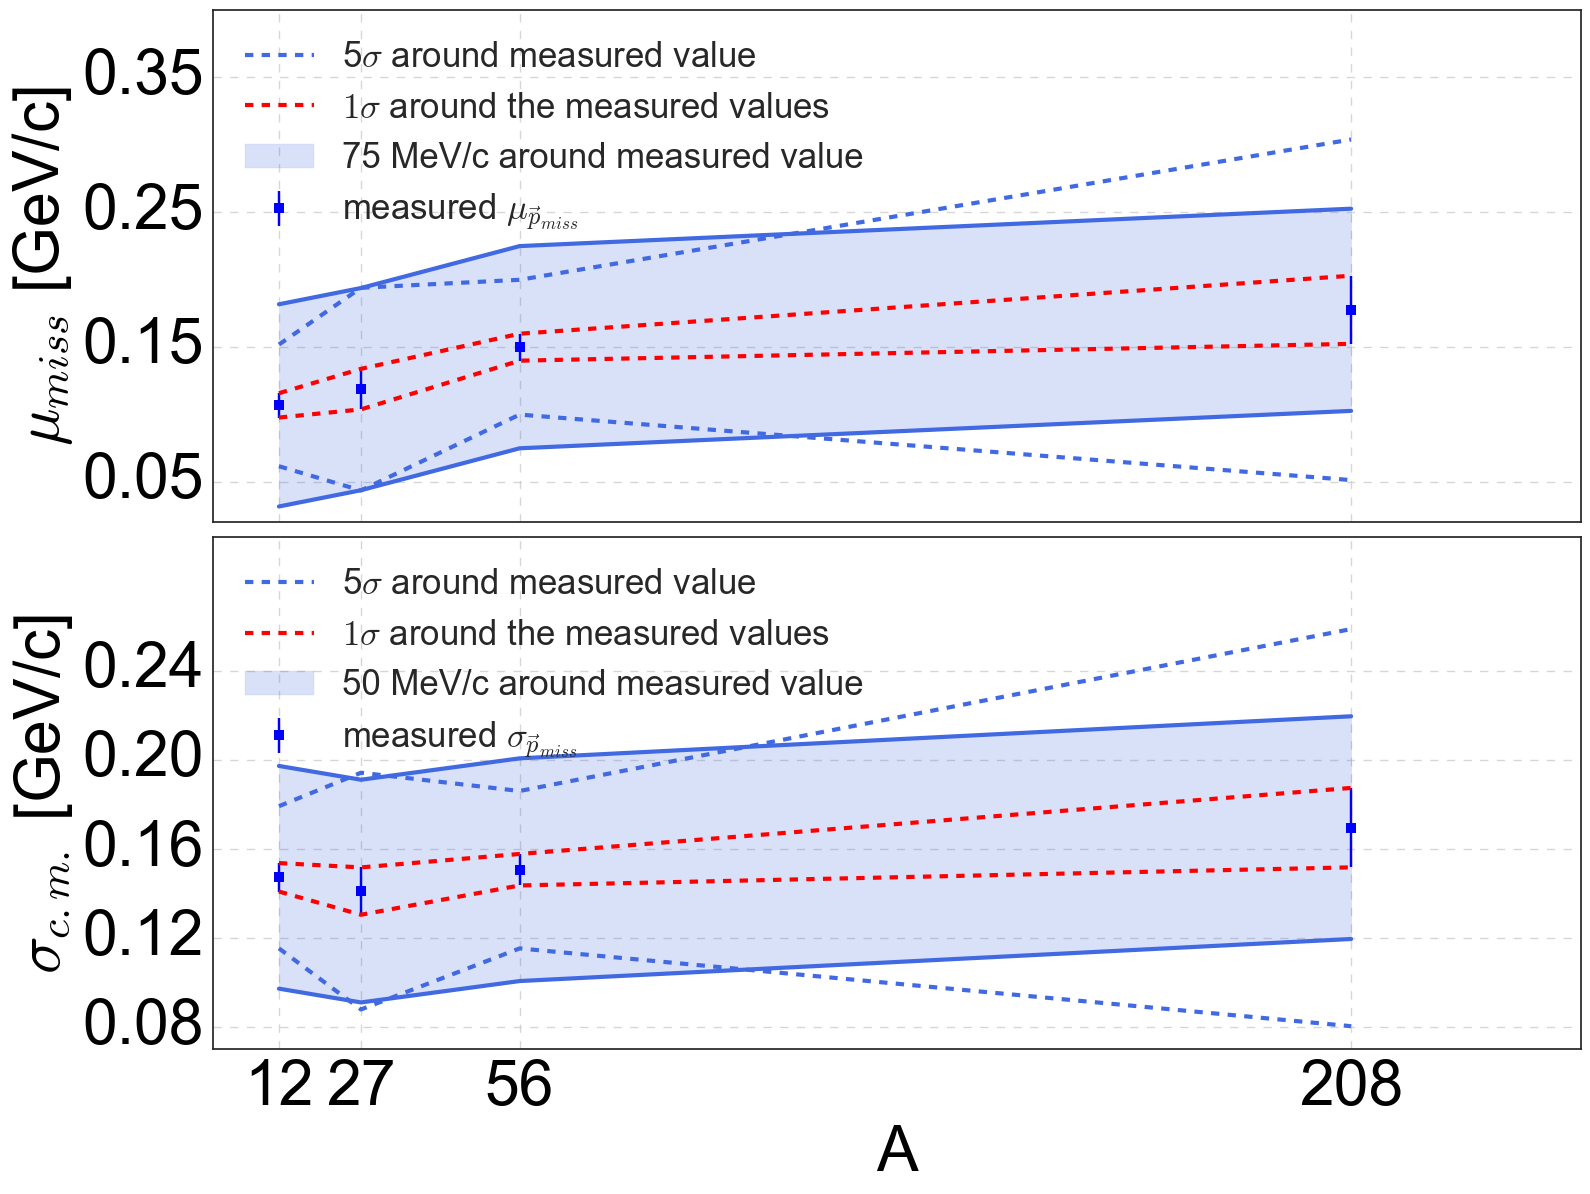

In [46]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,1,1)
ax.errorbar(x=cm_pars['A'],y=cm_pars['mean_z_unweighted'],yerr=cm_pars['mean_zErr_unweighted'],fmt='s'
            ,color='blue',label='measured $\\mu_{\\vec{p}_{miss}}$')
ax.fill_between(cm_pars['A']
                ,cm_pars['mean_z_unweighted']-0.075
                ,cm_pars['mean_z_unweighted']+0.075
                ,color='royalblue',alpha=0.2,label='75 MeV/c around measured value')

set_axes(ax,'','$\\mu_{miss}$ [GeV/c]',fontsize=45)
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.05,0.15,0.25,0.35]);
ax.grid(linestyle='--',alpha=0.8)
plt.plot(cm_pars['A'],cm_pars['mean_z_unweighted']-5*cm_pars['mean_zErr_unweighted'],'--',linewidth=3,color='royalblue',label='5$\\sigma$ around measured value')
plt.plot(cm_pars['A'],cm_pars['mean_z_unweighted']-cm_pars['mean_zErr_unweighted'],'--',linewidth=3,color='red' 
         , label= r'$1\sigma$ around the measured values')
plt.plot(cm_pars['A'],cm_pars['mean_z_unweighted']+cm_pars['mean_zErr_unweighted'],'--',linewidth=3,color='red')


ax.legend(fontsize=25,loc='upper left')
plt.plot(cm_pars['A'],cm_pars['mean_z_unweighted']-0.075,'-',linewidth=3,color='royalblue')
plt.plot(cm_pars['A'],cm_pars['mean_z_unweighted']+0.075,'-',linewidth=3,color='royalblue')
plt.plot(cm_pars['A'],cm_pars['mean_z_unweighted']+5*cm_pars['mean_zErr_unweighted'],'--',linewidth=3,color='royalblue')


ax.xaxis.set_major_formatter(NullFormatter())
ax.set_xlim(0,250);ax.set_ylim(0.02,0.4);

ax = fig.add_subplot(2,1,2)
ax.errorbar(x=cm_pars['A'],y=cm_pars['sigma_z_unweighted'],yerr=cm_pars['sigma_zErr_unweighted'],fmt='s'
            ,color='blue',label='measured $\\sigma_{\\vec{p}_{miss}}$')
ax.fill_between(cm_pars['A'] ,cm_pars['sigma_z_unweighted']-0.05 ,cm_pars['sigma_z_unweighted']+0.05
                ,color='royalblue',alpha=0.2,label='50 MeV/c around measured value')

set_axes(ax,'A','$\\sigma_{c.m.}$ [GeV/c]',fontsize=45)
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.08,0.12,0.16,0.20,0.24]);
ax.grid(linestyle='--',alpha=0.8)
plt.plot(cm_pars['A'],cm_pars['sigma_z_unweighted']-5*cm_pars['sigma_zErr_unweighted'],'--',linewidth=3,color='royalblue',label='5$\\sigma$ around measured value')
plt.plot(cm_pars['A'],cm_pars['sigma_z_unweighted']-cm_pars['sigma_zErr_unweighted'],'--',linewidth=3,color='red' 
         , label= r'$1\sigma$ around the measured values')
plt.plot(cm_pars['A'],cm_pars['sigma_z_unweighted']+cm_pars['sigma_zErr_unweighted'],'--',linewidth=3,color='red')

ax.legend(fontsize=25,loc='upper left')
plt.plot(cm_pars['A'],cm_pars['sigma_z_unweighted']-0.05,'-',linewidth=3,color='royalblue')
plt.plot(cm_pars['A'],cm_pars['sigma_z_unweighted']+0.05,'-',linewidth=3,color='royalblue')
plt.plot(cm_pars['A'],cm_pars['sigma_z_unweighted']+5*cm_pars['sigma_zErr_unweighted'],'--',linewidth=3,color='royalblue')

ax.set_xlim(0,250);ax.set_ylim(0.07,0.3);

plt.tight_layout()
outfilename = figures_path + 'mean_sigma_z_Adependence_constant_band_around_measured.pdf'
print 'saved',outfilename
plt.savefig(outfilename)


tab completion not implemented for this context


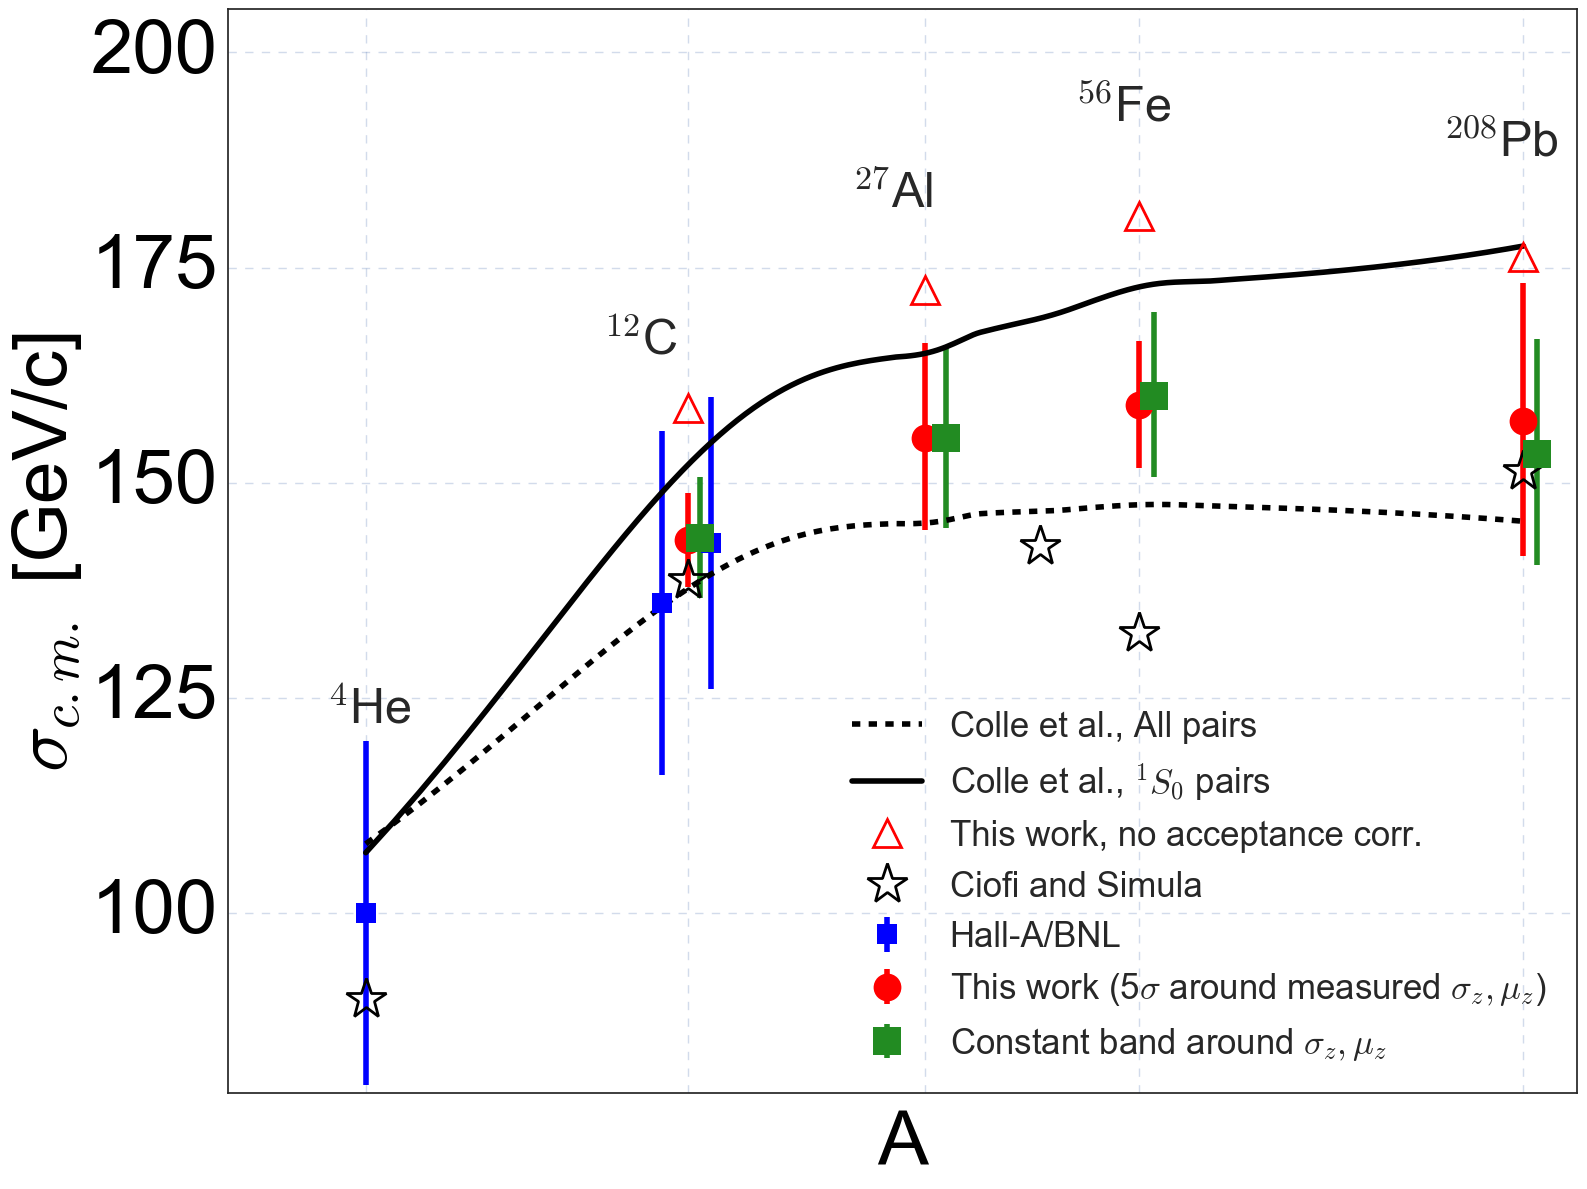

In [44]:
extraname='ConstBandAroundMeasuredValues'
label=r"Constant band around $\sigma_z,\mu_z$"
ax = plot_needed_for_A_depdendence_sigma_t(figsize=(16,12),ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(158,188), }),do_Ciofi=True)
plot_data_assymetric( data=nominal_results,direction='t',ax=ax, label=r"This work (5$\sigma$ around measured $\sigma_z,\mu_z$)" , marker='o', markersize=20 )
plot_data_assymetric( data=modified_results[extraname],Ashift=[0.5,2,3,10], direction='t'+extraname,ax=ax, label=label , marker='s', markersize=20 , color='forestgreen')
plt.legend(fontsize=20,loc='upper left')
# measured
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()
plt.savefig(figures_path +'results_compare_'+extraname+'.pdf')

# compare mean(z) linear in $p_{miss}$ (slope$\times(p_{miss}-0.3)$) with 5 $\times \Delta_{measured}$

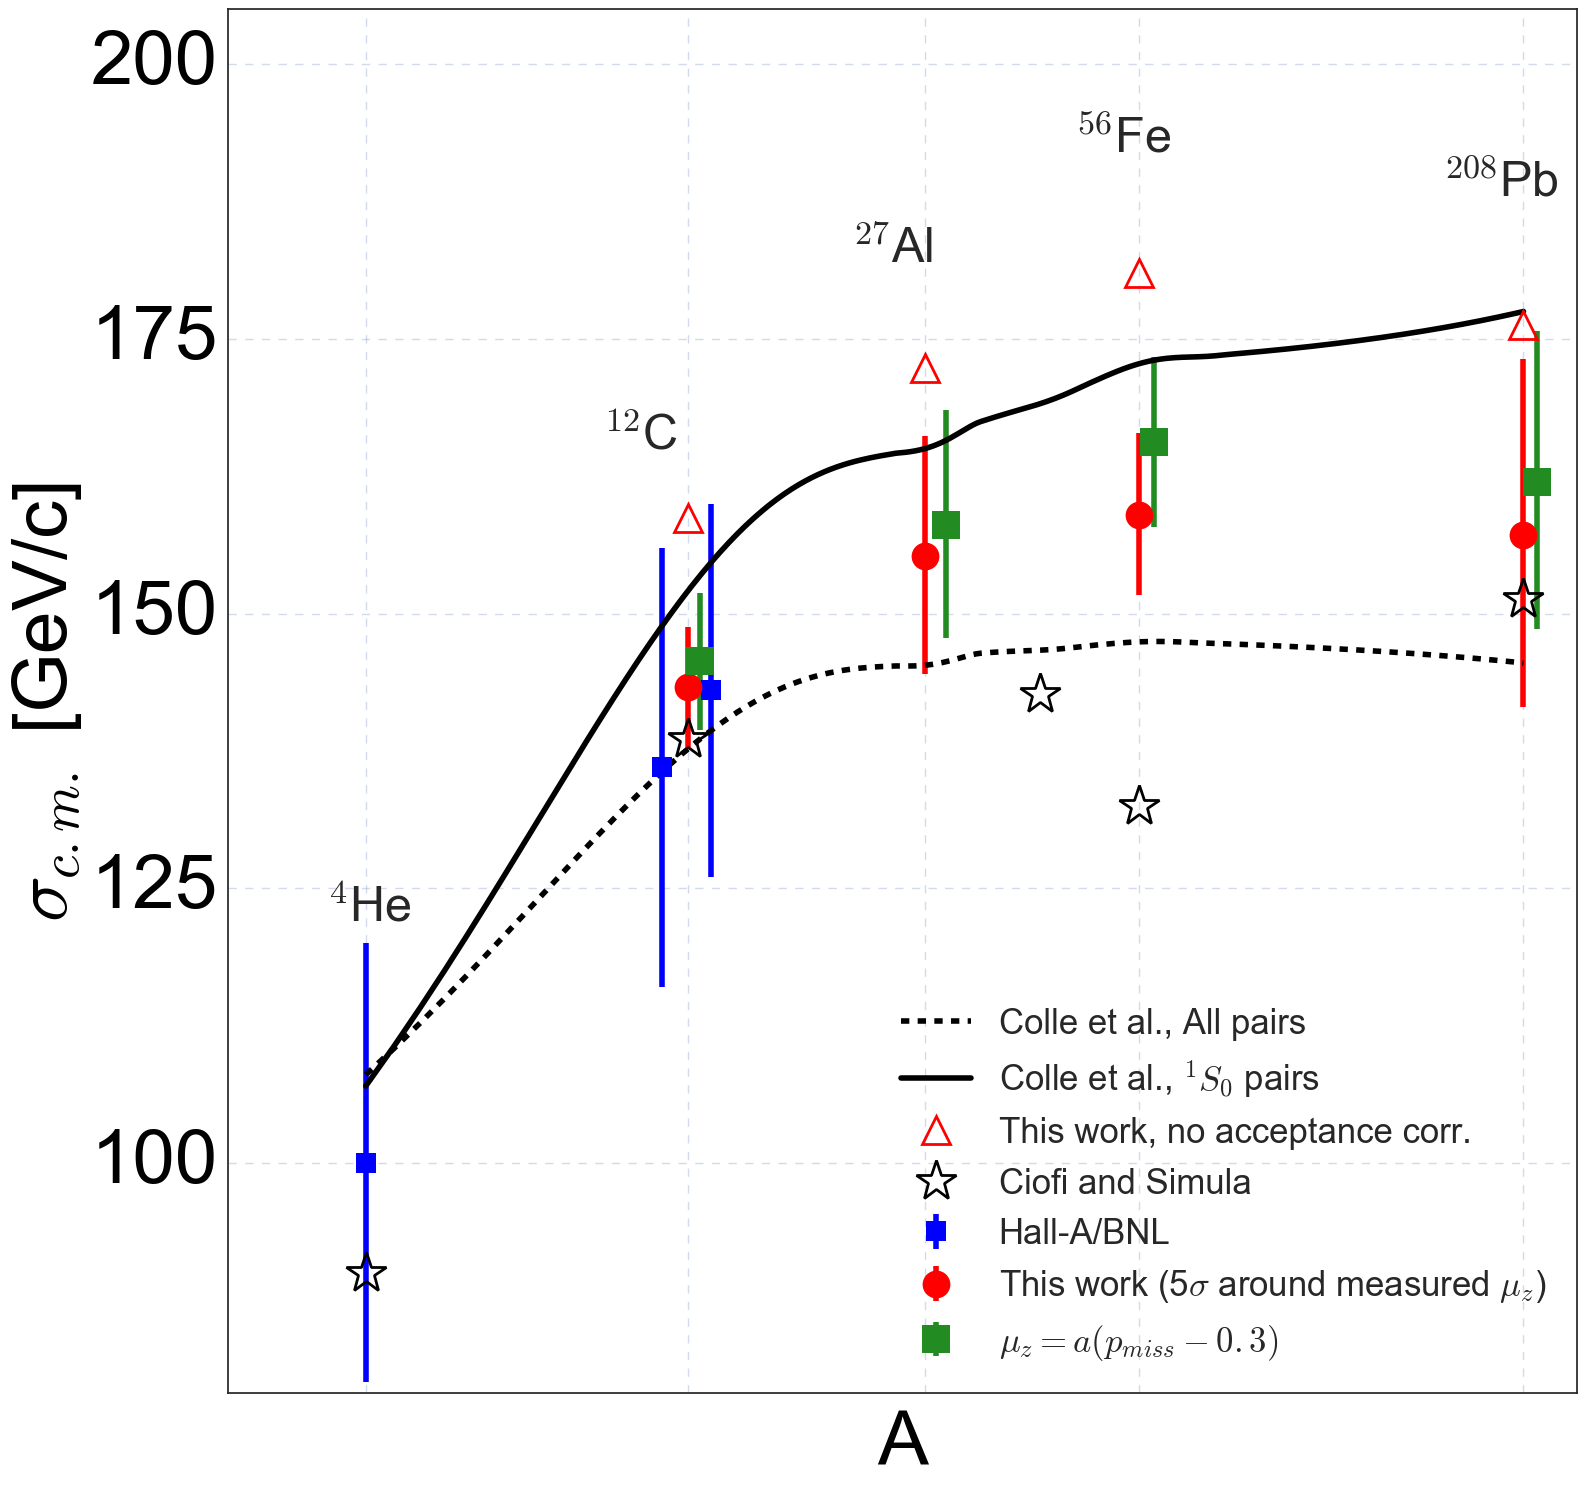

In [37]:
extraname='MeanZLinearInPmiss'
label=r"$\mu_{z}=a(p_{miss}-0.3)$"
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(158,188), }),do_Ciofi=True)
plot_data_assymetric( data=nominal_results,direction='t',ax=ax, label=r"This work (5$\sigma$ around measured $\mu_z$)" , marker='o', markersize=20 )
plot_data_assymetric( data=modified_results[extraname],Ashift=[0.5,2,3,10], direction='t'+extraname,ax=ax, label=label , marker='s', markersize=20 , color='forestgreen')
plt.legend(fontsize=20,loc='upper left')
# measured
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()
plt.savefig(figures_path +'results_compare_'+extraname+'.pdf')

# compare the method that looks for the minimal window with 68% confidence integral in each bin to the method of mean and rms
The quasi-data point would be the mean value of $\sigma_{gen}$ in this bin,
and the uncertaintly would be the distance from the right and left sides of the 68% interval

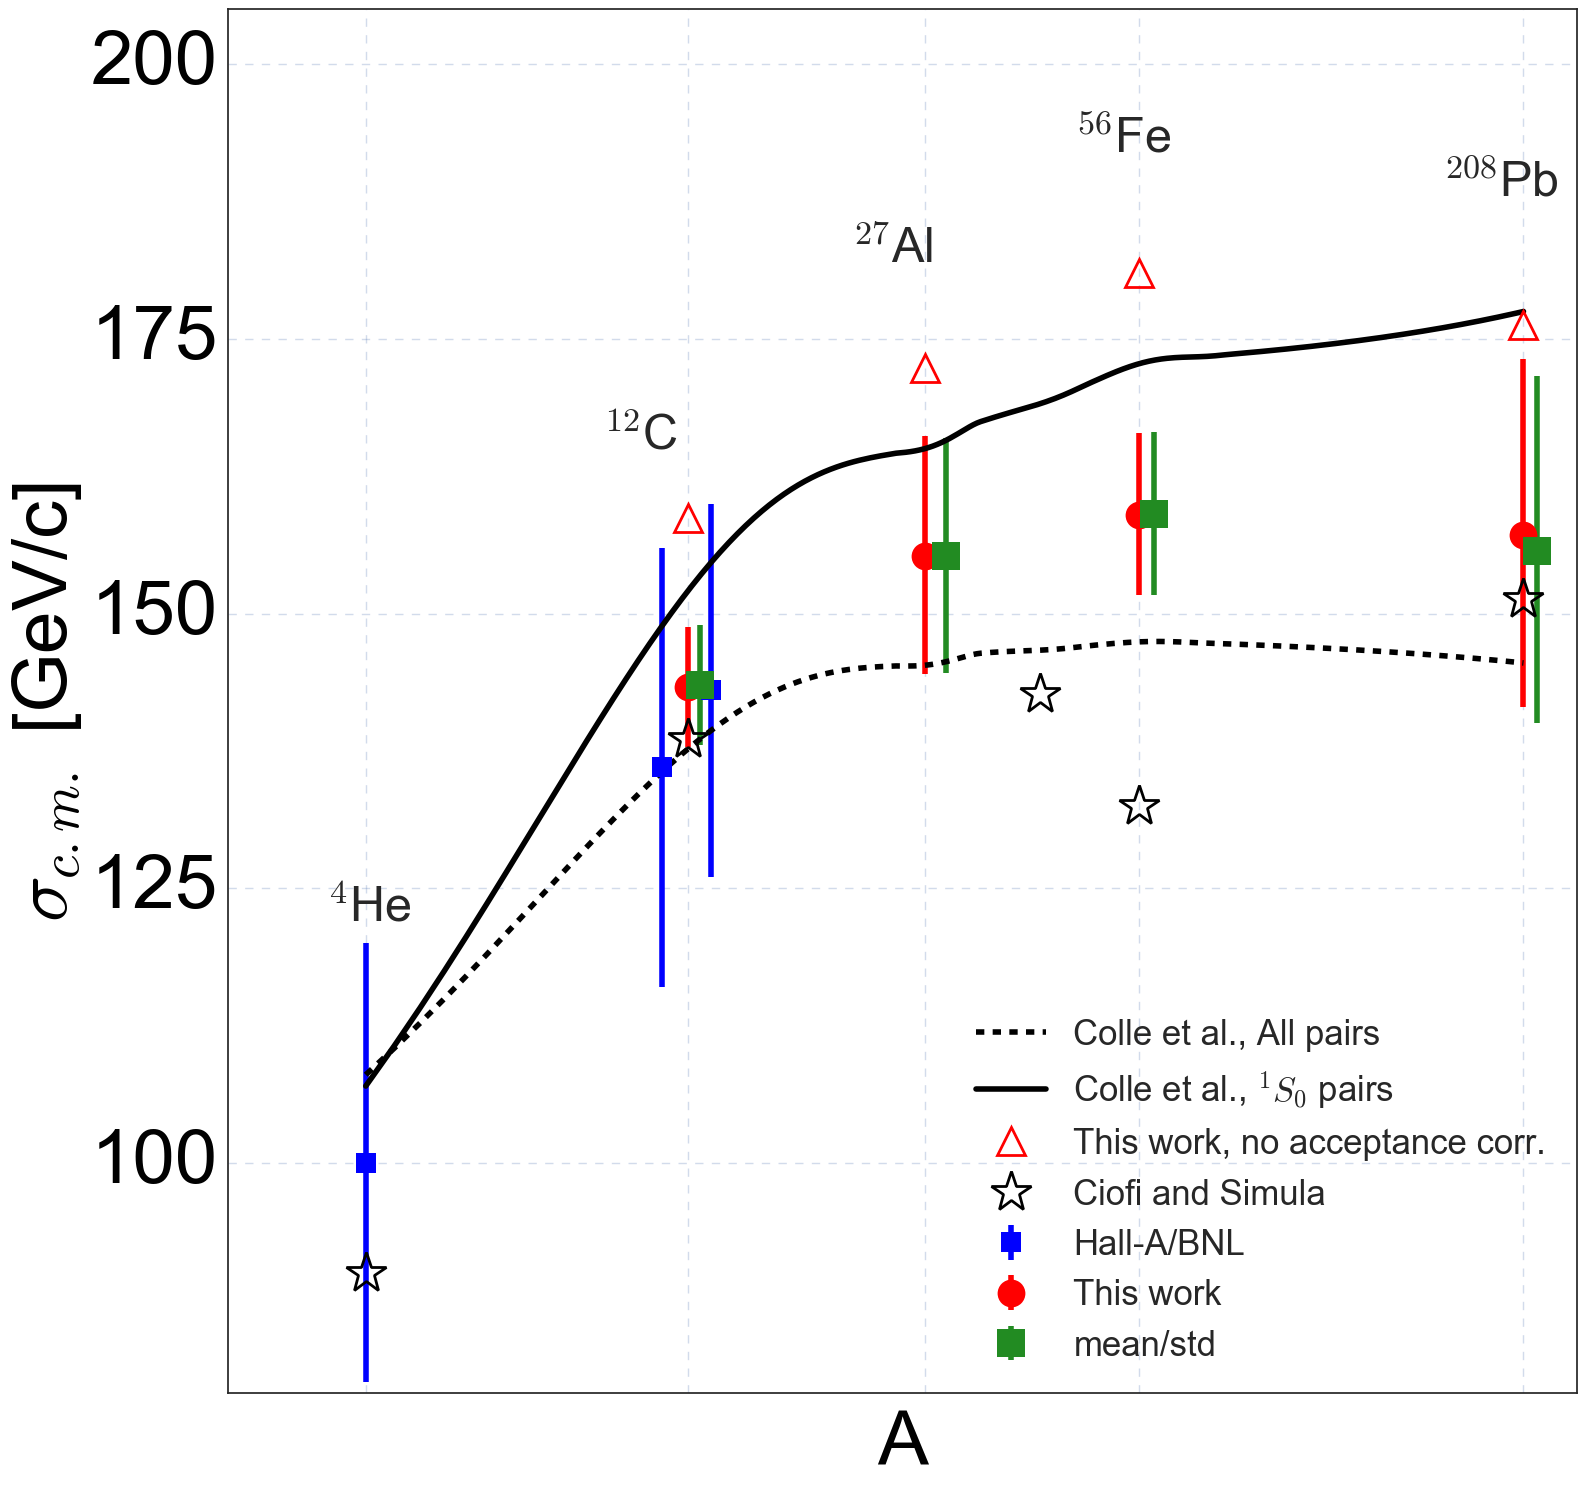

In [38]:
extraname='mean_rms'
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,192), '$^{208}$Pb':(158,188), }),do_Ciofi=True)

plot_data_assymetric( data=nominal_results,direction='t',ax=ax, label="This work" , marker='o', markersize=20 )
plot_data_assymetric( data=modified_results[extraname],Ashift=[0.5,2,3,10], direction='t'+extraname,ax=ax, label="mean/std" , marker='s', markersize=20 , color='forestgreen')
plt.legend(fontsize=20,loc='upper left')
# measured
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')

ax.legend(fontsize=25,loc='lower right')
plt.tight_layout()
plt.savefig(figures_path +'results_compare_mean_rms.pdf')

# compare alltogether

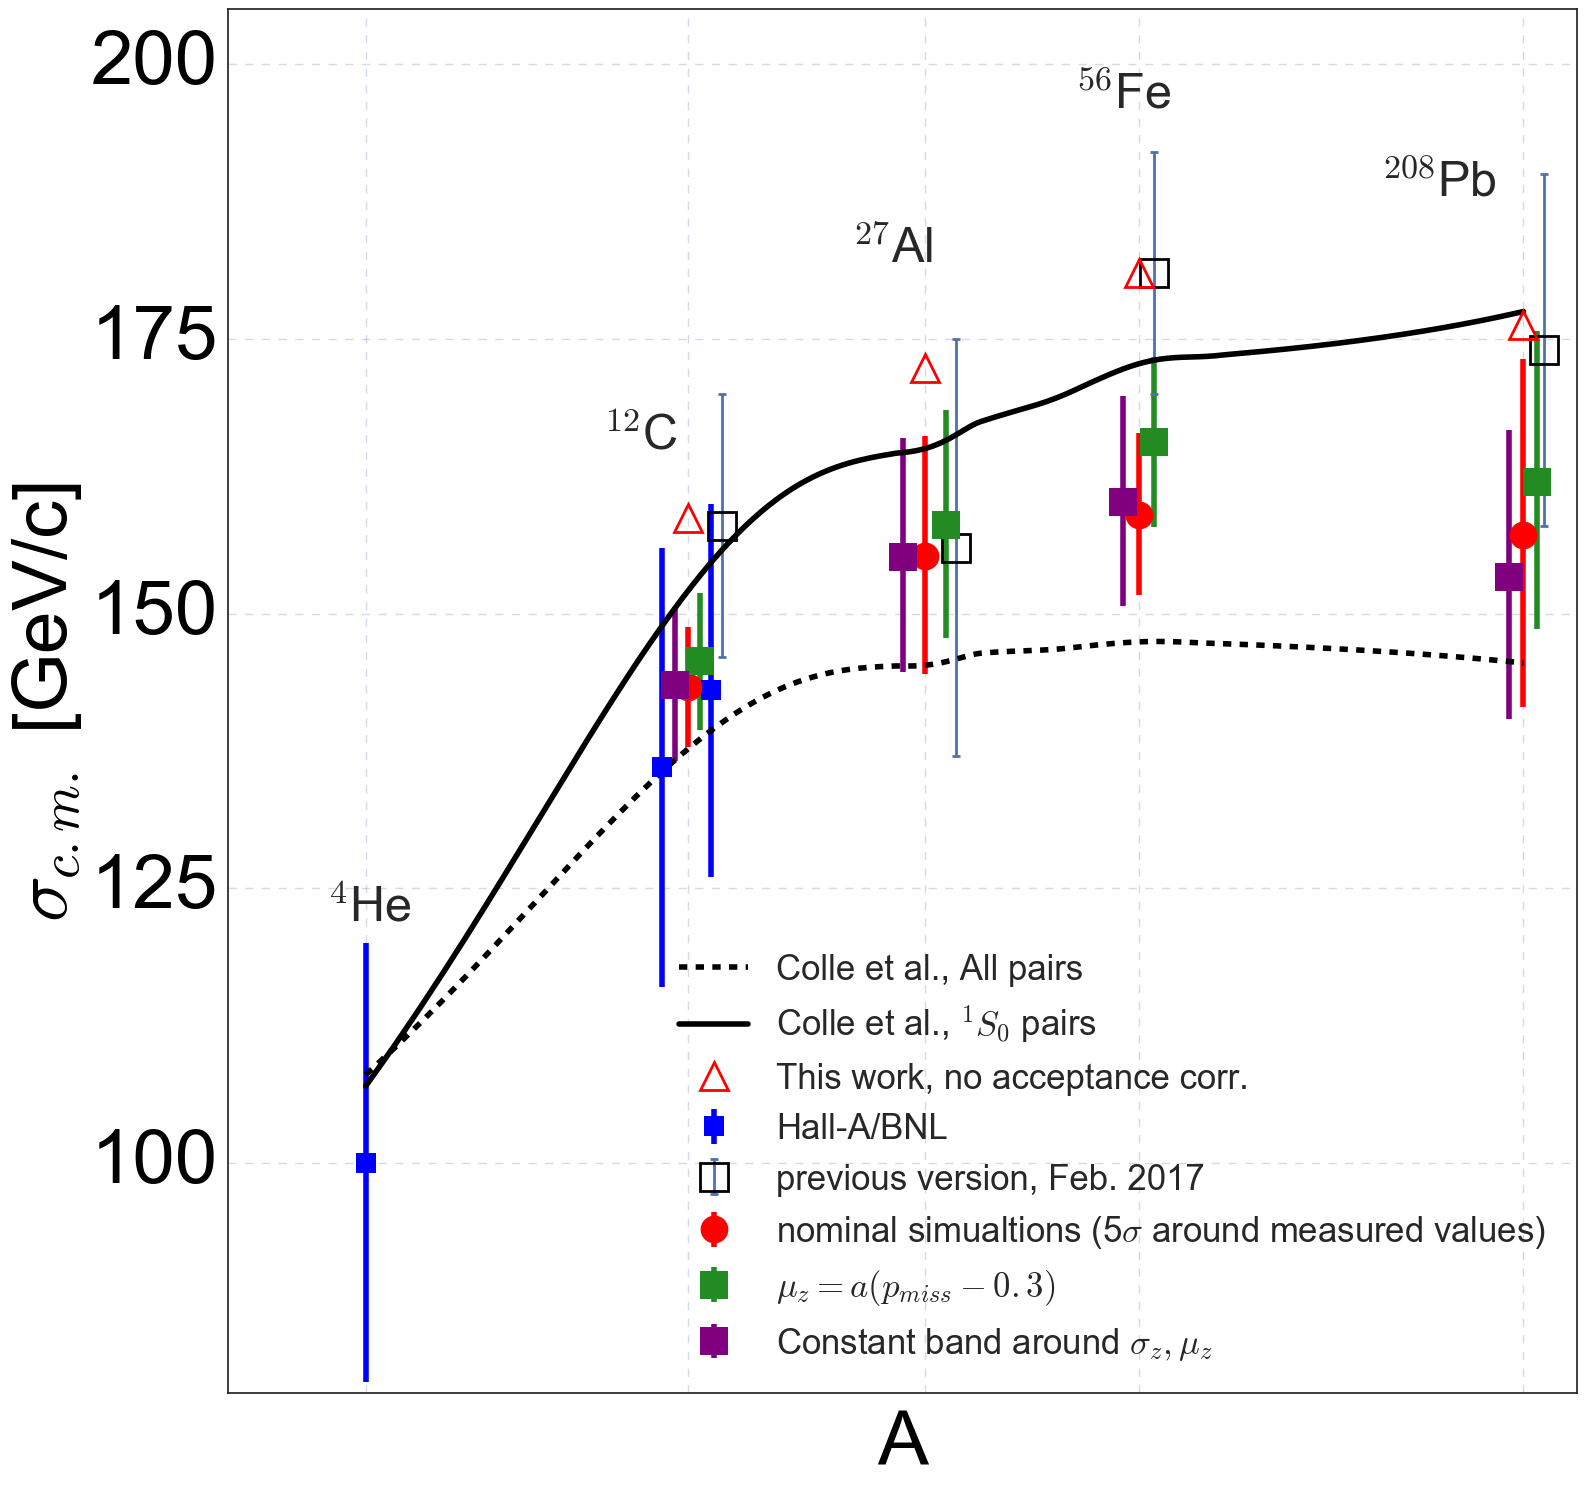

In [47]:
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,205),labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,196), '$^{208}$Pb':(128,188), }),do_Ciofi=False)

ax.errorbar(WI_Data['A']+[1.5,3,3,15], 1000*WI_Data['sigma_t_final'], 1000*WI_Data['sigma_t_final_err'] ,mec='black', linestyle='none', marker='s',mfc='none'
            ,lw = 3, mew = 2, ms = 20, linewidth=2, label='previous version, Feb. 2017')
plot_data_assymetric( data=nominal_results,ax=ax, label='nominal simualtions (5$\\sigma$ around measured values)', marker='o', markersize=20 )
ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')

for extraname,label,Ashift,color in zip(['MeanZLinearInPmiss','ConstBandAroundMeasuredValues'] #'mean_rms',
                                        ,[r'$\mu_{z}=a(p_{miss}-0.3)$',r'Constant band around $\sigma_z,\mu_z$'] #'mean/std',
                                        ,[[0.5,2,3,10],[-0.5,-2,-3,-10]]
                                        ,['forestgreen','purple']):
    plot_data_assymetric( data=modified_results[extraname],Ashift=Ashift, direction='t'+extraname,ax=ax, label=label , marker='s', markersize=20 , color=color)


ax.legend(fontsize=25, loc='lower right')
plt.tight_layout()
plt.savefig( figures_path + 'results_compare_alltogether.pdf')